In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
df = pd.read_csv('Stunting_Dataset.csv')

In [30]:
df = df.rename(columns={'Age': 'Age_Per_Month'})
df = df.rename(columns={'Birth Weight': 'Birth_Weight'})
df = df.rename(columns={'Birth Length': 'Birth_Length'})
df = df.rename(columns={'Body Weight': 'Body_Weight'})
df = df.rename(columns={'Body Length': 'Body_Length'})

In [31]:
# Menggunakan one-hot encoding dengan nilai 0 dan 1
df['Breastfeeding'] = df['Breastfeeding'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Stunting'] = df['Stunting'].apply(lambda x: 1 if x == 'Yes' else 0)

# Mengubah tipe data menjadi int64
df['Stunting'] = df['Stunting'].astype('int64')
df['Breastfeeding'] = df['Breastfeeding'].astype('int64')

gender_mapping = {
    'Male': 0,
    'Female': 1
}

#Use map to replace the values with integers
df['Gender'] = df['Gender'].map(gender_mapping)

# Convert the 'Classification' column to int64 data type
df['Gender'] = df['Gender'].astype('int64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  int64  
 1   Age_Per_Month  10000 non-null  int64  
 2   Birth_Weight   10000 non-null  float64
 3   Birth_Length   10000 non-null  int64  
 4   Body_Weight    10000 non-null  float64
 5   Body_Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  int64  
 7   Stunting       10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [33]:
df.head(10)

,Gender,Age_Per_Month,Birth_Weight,Birth_Length,Body_Weight,Body_Length,Breastfeeding,Stunting
0,0,17,3.0,49,10.0,72.2,0,0
1,1,11,2.9,49,2.9,65.0,0,1
2,0,16,2.9,49,8.5,72.2,0,1
3,0,31,2.8,49,6.4,63.0,0,1
4,0,15,3.1,49,10.5,49.0,0,1
5,1,11,2.8,49,8.5,65.0,0,0
6,0,35,2.8,49,10.5,72.2,0,1
7,1,17,2.8,49,8.0,63.0,0,1
8,1,10,2.7,49,8.4,73.5,0,0
9,1,16,2.8,49,8.5,65.0,0,1


In [34]:
df.isna().sum()

Gender           0
Age_Per_Month    0
Birth_Weight     0
Birth_Length     0
Body_Weight      0
Body_Length      0
Breastfeeding    0
Stunting         0
dtype: int64

In [35]:
df = df.drop(columns=['Breastfeeding'])

In [36]:
new_df = df

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

<AxesSubplot:>

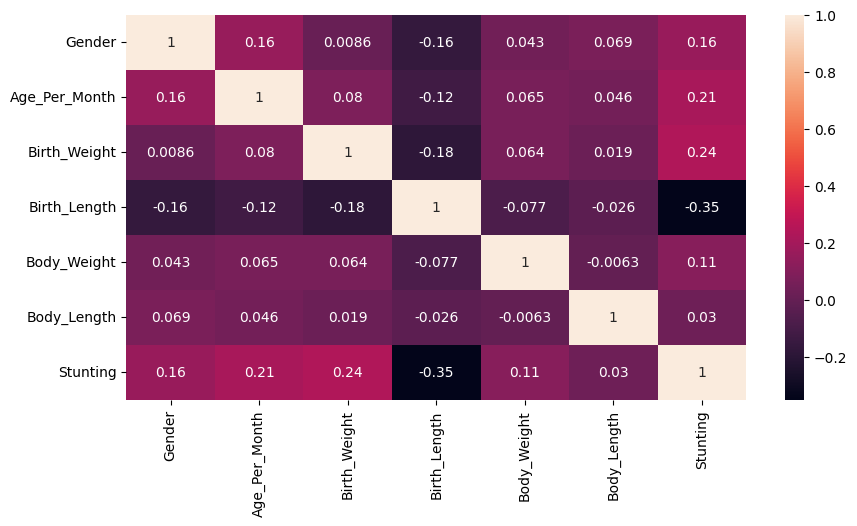

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(new_df.corr(),annot=True)

In [39]:
X = new_df.drop(columns=['Stunting'])
y = new_df['Stunting']

In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
import tensorflow as tf

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                448       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,721
Trainable params: 6,721
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, validation_data=(X_test_scaled, y_test))

Epoch 1/30
500/500 [==============================] - 5s 9ms/step - loss: 0.3995 - accuracy: 0.8418 - val_loss: 0.3770 - val_accuracy: 0.8480
Epoch 2/30
500/500 [==============================] - 4s 8ms/step - loss: 0.3730 - accuracy: 0.8493 - val_loss: 0.3740 - val_accuracy: 0.8495
Epoch 3/30
500/500 [==============================] - 4s 8ms/step - loss: 0.3702 - accuracy: 0.8535 - val_loss: 0.3700 - val_accuracy: 0.8455
Epoch 4/30
500/500 [==============================] - 4s 8ms/step - loss: 0.3663 - accuracy: 0.8560 - val_loss: 0.3755 - val_accuracy: 0.8475
Epoch 5/30
500/500 [==============================] - 4s 8ms/step - loss: 0.3637 - accuracy: 0.8565 - val_loss: 0.3841 - val_accuracy: 0.8460
Epoch 6/30
500/500 [==============================] - 4s 8ms/step - loss: 0.3618 - accuracy: 0.8533 - val_loss: 0.3725 - val_accuracy: 0.8450
Epoch 7/30
500/500 [==============================] - 5s 10ms/step - loss: 0.3604 - accuracy: 0.8566 - val_loss: 0.3697 - val_accuracy: 0.8520
Epoch

In [44]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)

63/63 [==============================] - 1s 6ms/step - loss: 0.3854 - accuracy: 0.8510
Test accuracy: 0.8510000109672546


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels on the test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.round(y_pred)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

63/63 [==============================] - 0s 3ms/step
Accuracy: 0.851
Precision: 0.87492762015055
Recall: 0.9485247959824231
F1-Score: 0.9102409638554217


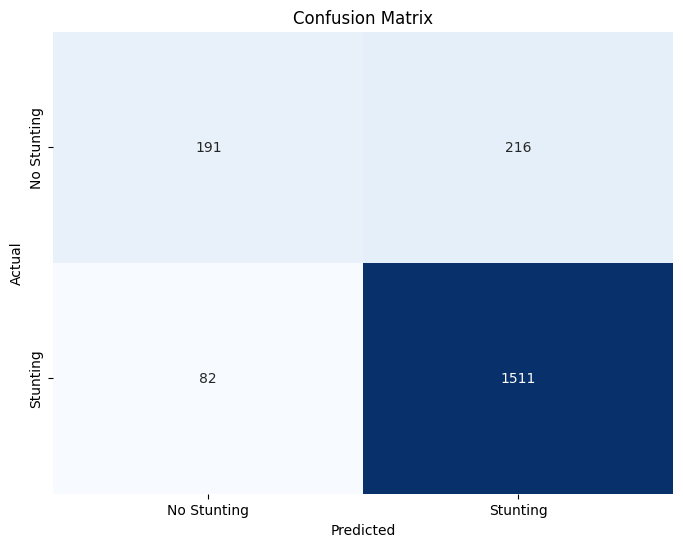

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Stunting', 'Stunting'], yticklabels=['No Stunting', 'Stunting'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

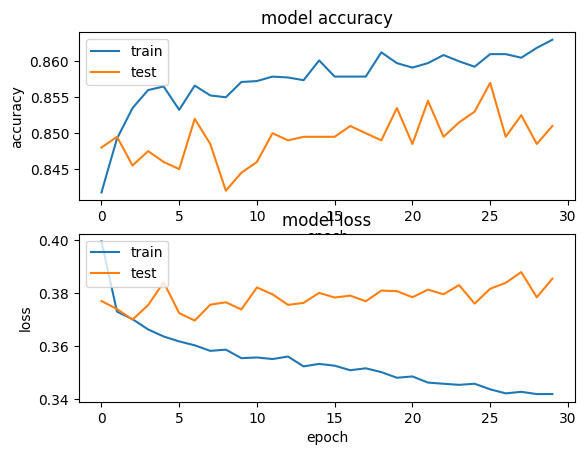

In [47]:
plt.figure(1)  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [48]:
model.save('./malnutrition_model_86.h5')